In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [50]:
data = pd.read_csv('data.csv', encoding='latin1') 
data.replace({'No Info': 'NaN', 'unknown amount': 'NaN'}, inplace=True)

X = data.drop(columns=['Dependent-Company Status'])  
y = data['Dependent-Company Status'] 

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_encoded_imputed = scaler.fit_transform(X_train)
X_test_encoded_imputed = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


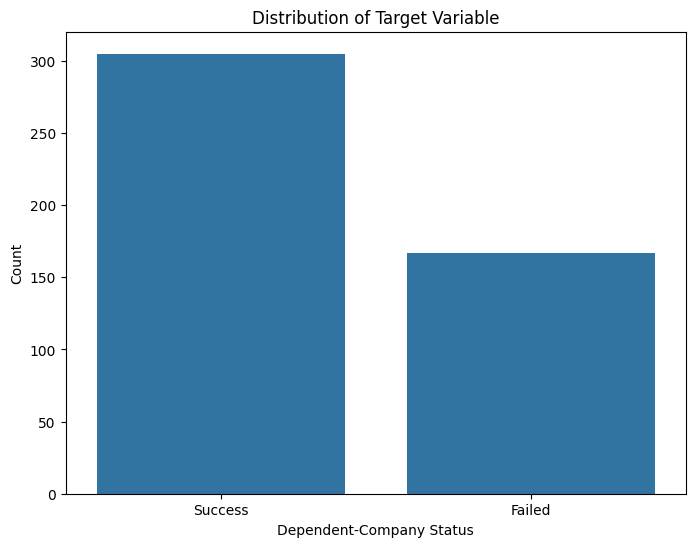

In [1]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.xlabel('Dependent-Company Status')
plt.ylabel('Count')
plt.show()

In [56]:
numerical_columns = X.select_dtypes(include=[np.number]).columns
X[numerical_columns].corr()

,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Industry trend in investing
Internet Activity Score,1.000000,0.100511,0.141396,0.029657,0.139881,0.089105,0.105978,0.041369
Employee Count,0.100511,1.000000,0.098178,0.371511,-0.021549,0.091659,0.497193,0.043491
Employees count MoM change,0.141396,0.098178,1.000000,0.120823,0.024138,0.080929,0.139582,0.199115
Last Funding Amount,0.029657,0.371511,0.120823,1.000000,0.013045,0.101469,0.376896,0.132535
Number of Co-founders,0.139881,-0.021549,0.024138,0.013045,1.000000,0.106028,0.138206,0.121460
Number of of advisors,0.089105,0.091659,0.080929,0.101469,0.106028,1.000000,0.303241,0.095711
Team size Senior leadership,0.105978,0.497193,0.139582,0.376896,0.138206,0.303241,1.000000,0.166963
Industry trend in investing,0.041369,0.043491,0.199115,0.132535,0.121460,0.095711,0.166963,1.000000


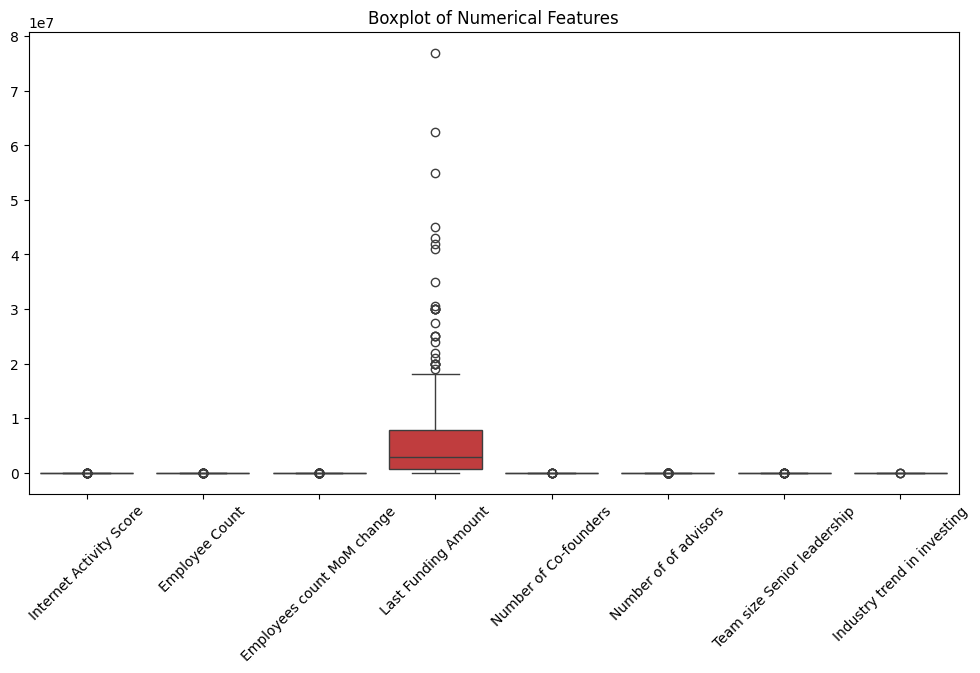

In [53]:
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=X[numerical_features])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

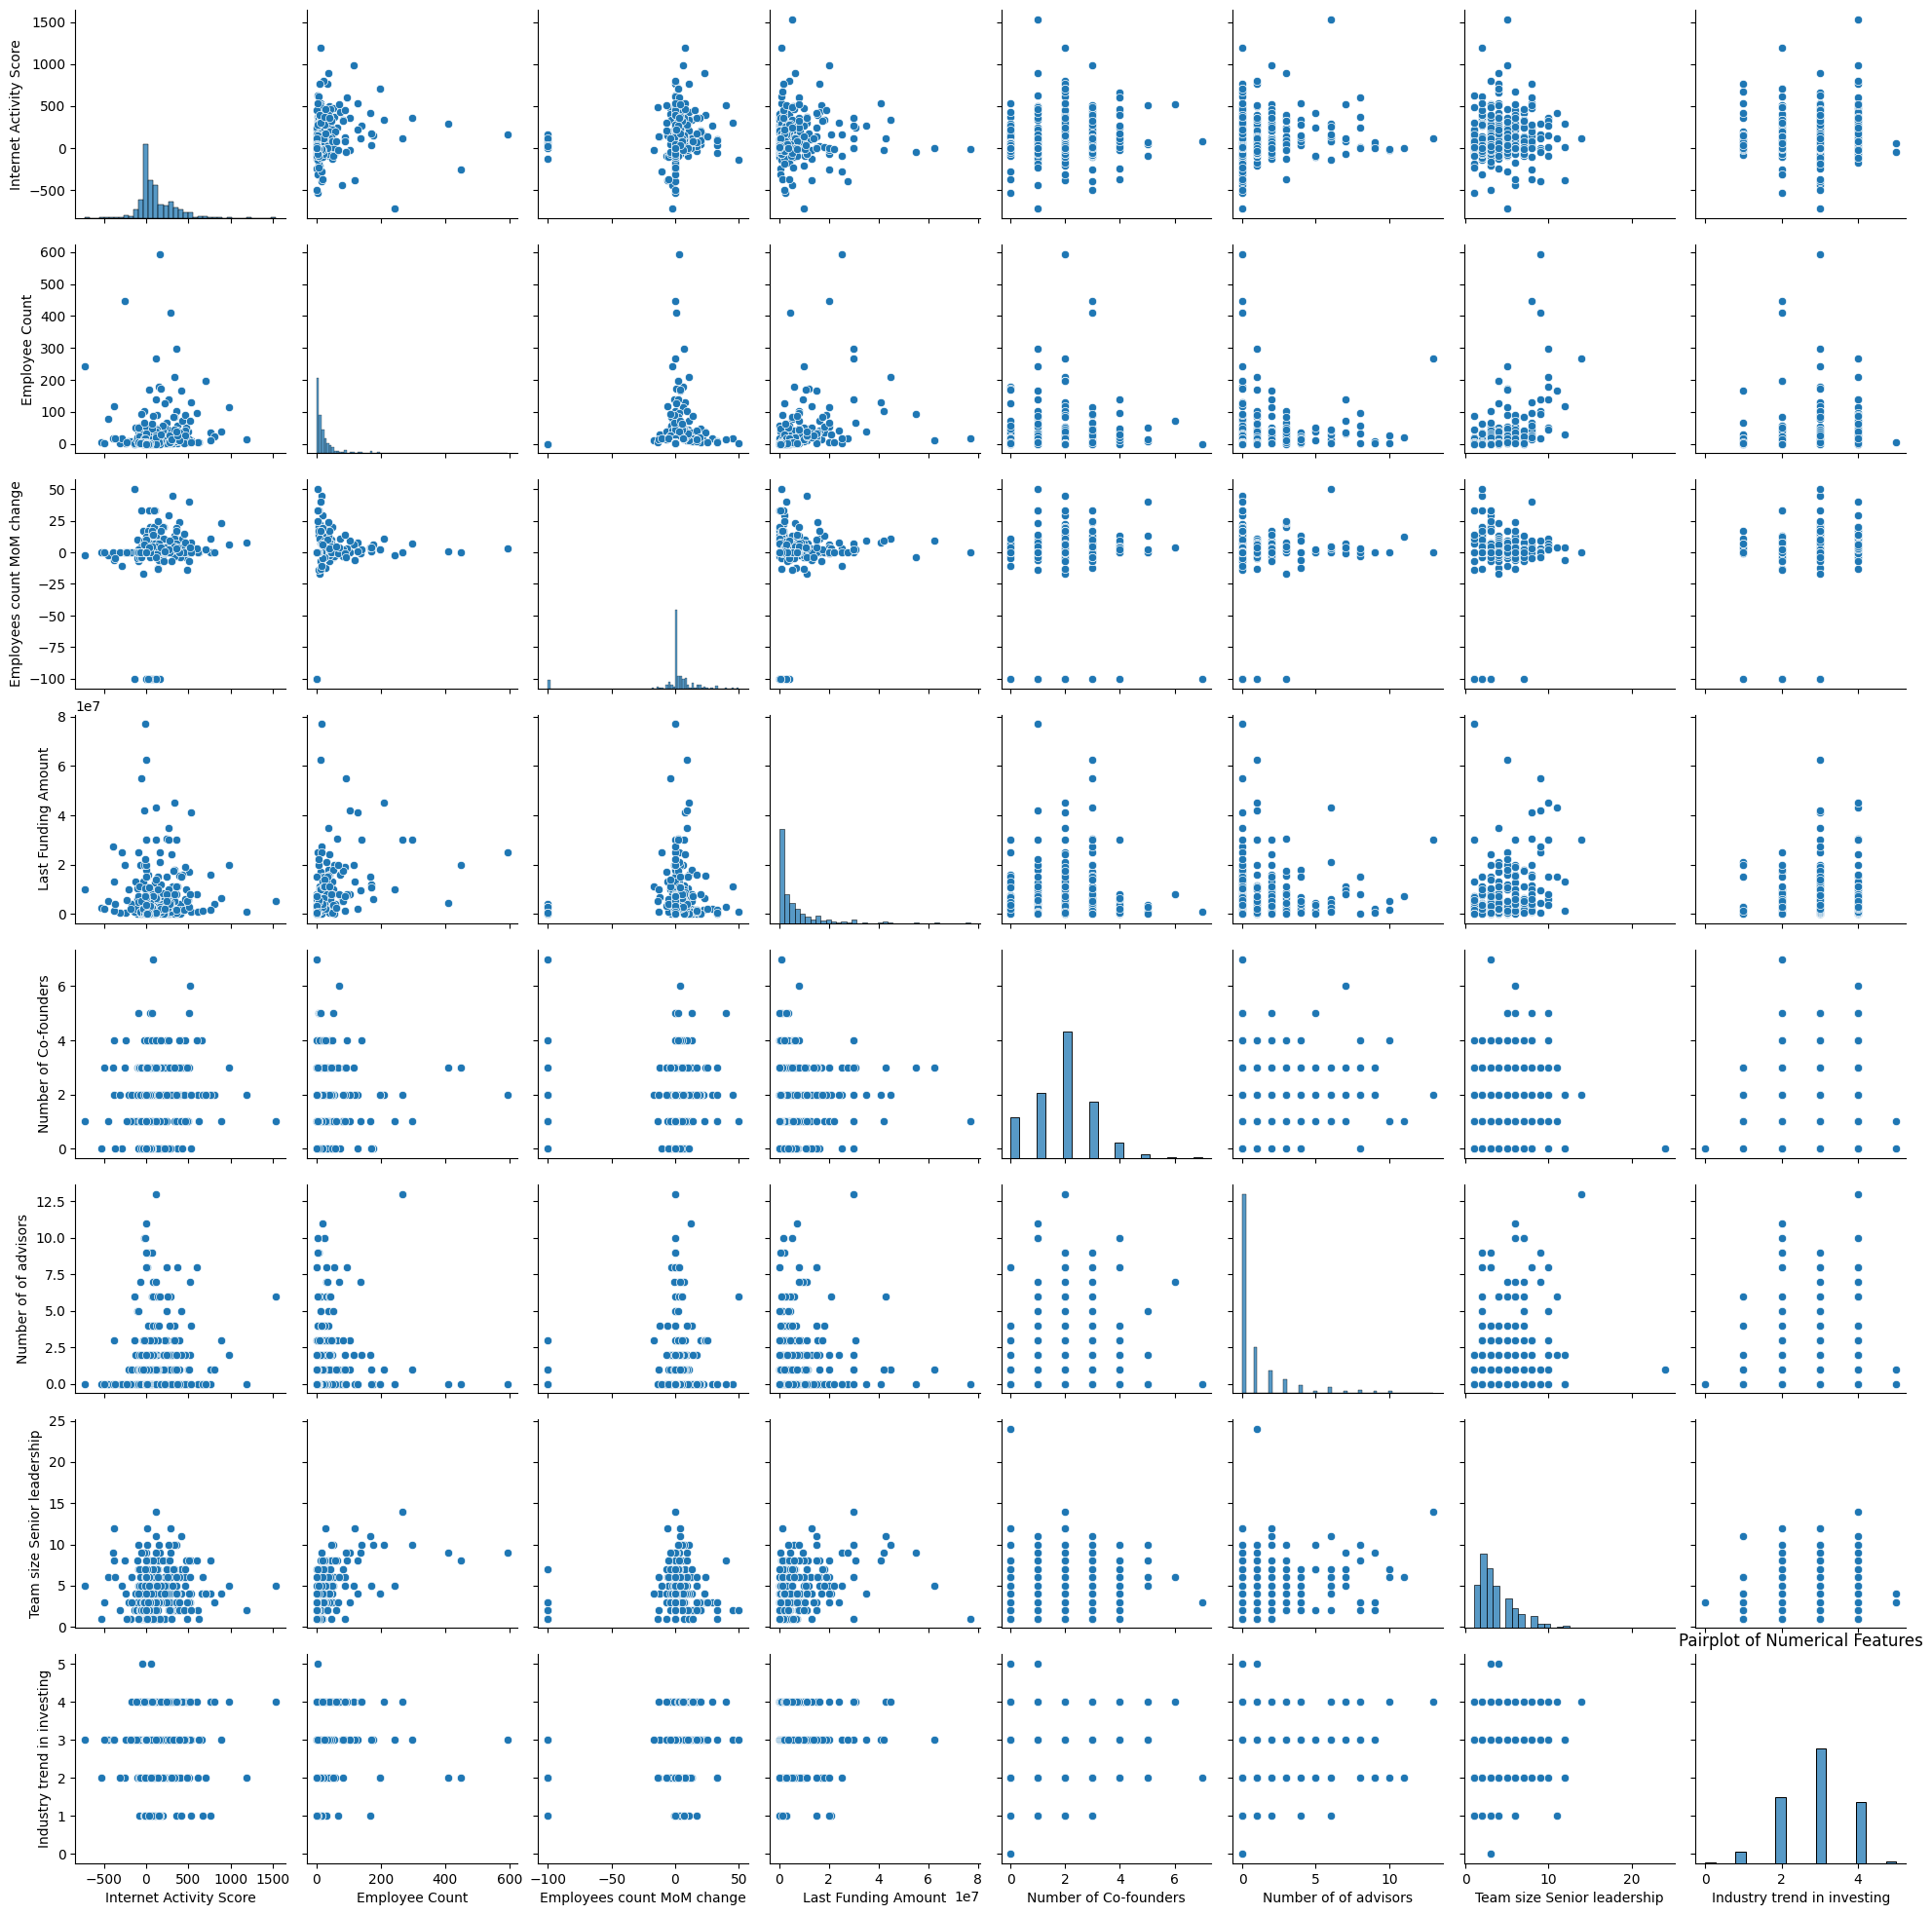

In [3]:
# 4. Pairplot for numerical features
sns.pairplot(data=X[numerical_features])
plt.title('Pairplot of Numerical Features')
plt.show()

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier , RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBRFClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score



dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train_encoded_imputed, y_train_encoded)

dt_pred = dt_model.predict(X_test_encoded_imputed)
dt_accuracy = accuracy_score(y_test_encoded, dt_pred)

print("Decision Tree Accuracy", dt_accuracy)



rf_model = RandomForestClassifier(random_state=42, n_estimators = 10)
rf_model.fit(X_train_encoded_imputed, y_train_encoded)

rf_pred = rf_model.predict(X_test_encoded_imputed)
rf_accuracy = accuracy_score(y_test_encoded, rf_pred)

print("Random Forest Accuracy", rf_accuracy)


# Train a Gradient Boosting model using HistGradientBoostingClassifier
gb_model_hist = HistGradientBoostingClassifier(random_state=42)
gb_model_hist.fit(X_train_encoded_imputed, y_train_encoded)

# Evaluate the model on the encoded and imputed test data
gb_pred_hist = gb_model_hist.predict(X_test_encoded_imputed)
gb_accuracy_hist = accuracy_score(y_test_encoded, gb_pred_hist)

print("HistGradient Boosting Accuracy ", gb_accuracy_hist)


Decision Tree Accuracy: 0.8421052631578947
Random Forest Accuracy: 0.8736842105263158
HistGradient Boosting Accuracy : 0.9157894736842105


In [38]:
dt_feature_importance = dt_model.feature_importances_

rf_feature_importance = rf_model.feature_importances_

In [39]:
print("Decision Tree Feature Importances")
for feature, importance in zip(X.columns, dt_feature_importance):
    print(f"{feature}: {importance}")


Decision Tree Feature Importances:
Internet Activity Score: 0.3522429181058549
Employee Count: 0.0
Employees count MoM change: 0.0
Last Funding Amount: 0.02366753881502971
Number of Co-founders: 0.007206524425405885
Number of of advisors: 0.0
Team size Senior leadership: 0.012734588353121547
Industry trend in investing: 0.008185760019451482
Company_Name_Company10: 0.0
Company_Name_Company100: 0.0
Company_Name_Company101: 0.0
Company_Name_Company102: 0.0
Company_Name_Company103: 0.0
Company_Name_Company104: 0.0
Company_Name_Company105: 0.0
Company_Name_Company106: 0.0
Company_Name_Company107: 0.0
Company_Name_Company108: 0.0
Company_Name_Company109: 0.0
Company_Name_Company11: 0.0
Company_Name_Company110: 0.0
Company_Name_Company111: 0.0
Company_Name_Company112: 0.0
Company_Name_Company113: 0.0
Company_Name_Company114: 0.0
Company_Name_Company115: 0.0
Company_Name_Company116: 0.0
Company_Name_Company117: 0.0
Company_Name_Company118: 0.0
Company_Name_Company119: 0.0
Company_Name_Company1

In [40]:
# Print feature importances for Random Forest
print("Random Forest Feature Importances")
for feature, importance in zip(X.columns, rf_feature_importance):
    print(f"{feature}: {importance}")

Random Forest Feature Importances:
Internet Activity Score: 0.014740936772300562
Employee Count: 0.03210964806233329
Employees count MoM change: 0.0
Last Funding Amount: 0.0014134690711835617
Number of Co-founders: 0.002135549928040047
Number of of advisors: 0.005550646957763009
Team size Senior leadership: 0.010910261463174826
Industry trend in investing: 0.0010198762010783981
Company_Name_Company10: 0.0
Company_Name_Company100: 0.0
Company_Name_Company101: 0.0
Company_Name_Company102: 0.0
Company_Name_Company103: 0.0
Company_Name_Company104: 0.0
Company_Name_Company105: 0.0
Company_Name_Company106: 0.0
Company_Name_Company107: 0.0
Company_Name_Company108: 0.0
Company_Name_Company109: 0.0
Company_Name_Company11: 0.0
Company_Name_Company110: 0.0
Company_Name_Company111: 0.0
Company_Name_Company112: 0.0
Company_Name_Company113: 0.0
Company_Name_Company114: 0.0
Company_Name_Company115: 0.0
Company_Name_Company116: 0.0
Company_Name_Company117: 0.0
Company_Name_Company118: 0.0
Company_Name

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.inspection import permutation_importance
import pandas as pd

data = pd.read_csv('data.csv', encoding='latin1') 
data.replace({'No Info':'NaN', 'unknown amount': 'NaN'}, inplace=True)

X = data.drop(columns=['Dependent-Company Status'])  # Features
y = data['Dependent-Company Status']  # Target variable

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_encoded_imputed = scaler.fit_transform(X_train)
X_test_encoded_imputed = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train_encoded_imputed, y_train_encoded)

dt_pred = dt_model.predict(X_test_encoded_imputed)
dt_accuracy = accuracy_score(y_test_encoded, dt_pred)
dt_precision = precision_score(y_test_encoded, dt_pred)
dt_recall = recall_score(y_test_encoded, dt_pred)
dt_roc_auc = roc_auc_score(y_test_encoded, dt_pred)
dt_f1 = f1_score(y_test_encoded, dt_pred)
tn_dt, fp_dt, _, _ = confusion_matrix(y_test_encoded, dt_pred).ravel()
dt_specificity = tn_dt / (tn_dt + fp_dt)
dt_balanced_accuracy = balanced_accuracy_score(y_test_encoded, dt_pred)

rf_model = RandomForestClassifier(random_state=42, n_estimators = 10)
rf_model.fit(X_train_encoded_imputed, y_train_encoded)

rf_pred = rf_model.predict(X_test_encoded_imputed)
rf_accuracy = accuracy_score(y_test_encoded, rf_pred)
rf_precision = precision_score(y_test_encoded, rf_pred)
rf_recall = recall_score(y_test_encoded, rf_pred)
rf_roc_auc = roc_auc_score(y_test_encoded, rf_pred)
rf_f1 = f1_score(y_test_encoded, rf_pred)
tn_rf, fp_rf, _, _ = confusion_matrix(y_test_encoded, rf_pred).ravel()
rf_specificity = tn_rf / (tn_rf + fp_rf)
rf_balanced_accuracy = balanced_accuracy_score(y_test_encoded, rf_pred)

gb_model_hist = HistGradientBoostingClassifier(random_state=42)
gb_model_hist.fit(X_train_encoded_imputed, y_train_encoded)

gb_pred_hist = gb_model_hist.predict(X_test_encoded_imputed)
gb_accuracy_hist = accuracy_score(y_test_encoded, gb_pred_hist)
gb_precision_hist = precision_score(y_test_encoded, gb_pred_hist)
gb_recall_hist = recall_score(y_test_encoded, gb_pred_hist)
gb_roc_auc_hist = roc_auc_score(y_test_encoded, gb_pred_hist)
gb_f1_hist = f1_score(y_test_encoded, gb_pred_hist)
tn_gb, fp_gb, _, _ = confusion_matrix(y_test_encoded, gb_pred_hist).ravel()
gb_specificity_hist = tn_gb / (tn_gb + fp_gb)
gb_balanced_accuracy_hist = balanced_accuracy_score(y_test_encoded, gb_pred_hist)


print("Decision Tree Scores")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"ROC AUC: {dt_roc_auc}")
print(f"F1 Score: {dt_f1}")
print(f"Specificity: {dt_specificity}")
print(f"Balanced Accuracy: {dt_balanced_accuracy}\n")
print("---------------------------------------------------------------")
print("Random Forest Scores")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"ROC AUC: {rf_roc_auc}")
print(f"F1 Score: {rf_f1}")
print(f"Specificity: {rf_specificity}")
print(f"Balanced Accuracy: {rf_balanced_accuracy}\n")
print("---------------------------------------------------------------")

print("HistGradient Boosting Scores")
print(f"Accuracy: {gb_accuracy_hist}")
print(f"Precision: {gb_precision_hist}")
print(f"Recall: {gb_recall_hist}")
print(f"ROC AUC: {gb_roc_auc_hist}")
print(f"F1 Score: {gb_f1_hist}")
print(f"Specificity: {gb_specificity_hist}")
print(f"Balanced Accuracy: {gb_balanced_accuracy_hist}\n")


Decision Tree Scores
Accuracy: 0.9263157894736842
Precision: 0.9365079365079365
Recall: 0.9516129032258065
ROC AUC: 0.9152003910068427
F1 Score: 0.944
Specificity: 0.8787878787878788
Balanced Accuracy: 0.9152003910068427

---------------------------------------------------------------
Random Forest Scores
Accuracy: 0.9052631578947369
Precision: 0.9491525423728814
Recall: 0.9032258064516129
ROC AUC: 0.906158357771261
F1 Score: 0.9256198347107438
Specificity: 0.9090909090909091
Balanced Accuracy: 0.906158357771261

---------------------------------------------------------------
HistGradient Boosting Scores
Accuracy: 0.9157894736842105
Precision: 0.9655172413793104
Recall: 0.9032258064516129
ROC AUC: 0.9213098729227762
F1 Score: 0.9333333333333333
Specificity: 0.9393939393939394
Balanced Accuracy: 0.9213098729227762



In [881]:
# # Replace NaN values with an empty string
# data['Investors'] = data['Investors'].fillna('')

# # Splitting investor names
# investors = data['Investors'].str.split('|')

# # Get unique investor names
# unique_investors = list(set(investor for sublist in investors for investor in sublist))

# # Creating a DataFrame with binary indicators for each investor
# investor_df = pd.DataFrame(0, index=data.index, columns=unique_investors)

# # Assigning 1 to the corresponding investors
# for idx, investor_list in enumerate(investors):
#     investor_df.loc[idx, investor_list] = 1

# # Concatenating the investor DataFrame with the original DataFramea
# data = pd.concat([data, investor_df], axis=1)

# # Dropping the original 'Investors' column if necessary
# data.drop(columns=['Investors'], inplace=True)

# data